<a href="https://colab.research.google.com/github/oyaon/Machine-Learning-Using-Python/blob/main/RainfallPredict1524_RegressionandClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare the Data

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Dhaka1524.csv", parse_dates=["Date"])

# Check the first few rows
print(df.head())

# Summary statistics
print(df.describe())

        Date  TempMax  TempMin  Humidity  Rainfall
0 2015-01-01    25.08    17.04     11.08       1.6
1 2015-01-02    29.15    17.79     12.54       1.4
2 2015-01-03    29.24    19.69     13.17       0.0
3 2015-01-04    27.78    18.39     13.00       1.3
4 2015-01-05    26.13    15.85     10.07       0.0
                      Date      TempMax      TempMin     Humidity     Rainfall
count                 3653  3653.000000  3653.000000  3653.000000  3653.000000
mean   2020-01-01 00:00:00    29.988095    21.712080    16.335223     6.687955
min    2015-01-01 00:00:00    17.690000     7.010000     5.260000     0.000000
25%    2017-07-02 00:00:00    27.670000    17.570000    11.380000     0.000000
50%    2020-01-01 00:00:00    30.520000    24.130000    17.520000     1.400000
75%    2022-07-02 00:00:00    32.150000    26.180000    21.330000     9.100000
max    2024-12-31 00:00:00    42.700000    28.890000    23.890000   125.500000
std                    NaN     3.790435     5.349108     5.253

In [2]:
# Example: Replace unrealistic humidity values with the mean
df["Humidity"] = df["Humidity"].apply(lambda x: df["Humidity"].mean() if x < 20 else x)

## Feature Engineering

In [3]:
df["Month"] = df["Date"].dt.month
df["DayOfYear"] = df["Date"].dt.dayofyear
df["Year"] = df["Date"].dt.year

In [4]:
df["Rainfall_Lag1"] = df["Rainfall"].shift(1)  # Rainfall from the previous day
df["TempMax_Lag1"] = df["TempMax"].shift(1)

In [5]:
df.dropna(inplace=True)

Exploratory Data Analysis (EDA)

<Axes: title={'center': 'Rainfall Over Time'}>

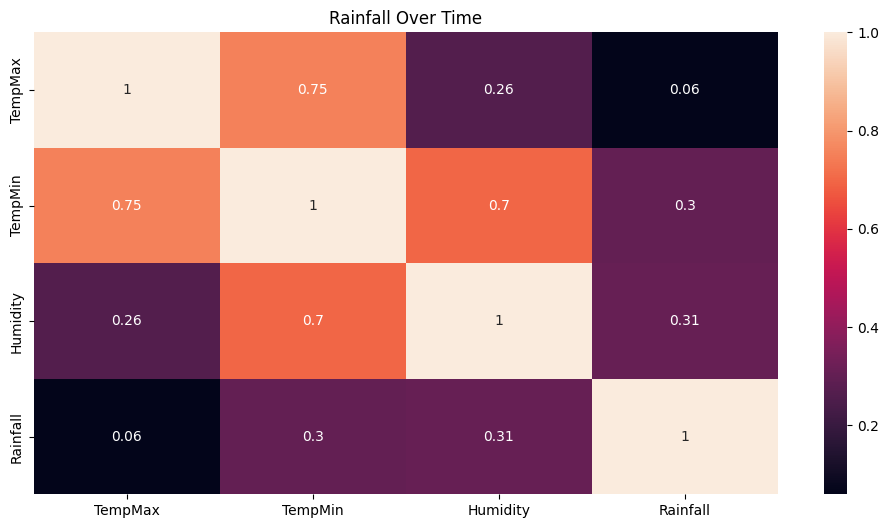

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot rainfall over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Date"], y=df["Rainfall"])
plt.title("Rainfall Over Time")

# Correlation matrix
corr = df[["TempMax", "TempMin", "Humidity", "Rainfall"]].corr()
sns.heatmap(corr, annot=True)

# Split the Data

In [7]:
X = df[["TempMax", "TempMin", "Humidity", "Month", "Rainfall_Lag1"]]
y = df["Rainfall"]  # Target variable

In [8]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Train a Model

Regression (Predict Rainfall Amount)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 184.93408900822368


Classification (Predict Rain vs. No Rain)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split

# Convert rainfall to binary (1 if rainfall > 0, else 0)
y_binary = (y > 0).astype(int)

# Split again for classification
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2)

# Train and evaluate
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.8919288645690835


# Improve the Model

Hyperparameter Tuning:

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

Best parameters: {'max_depth': 10, 'n_estimators': 200}


In [13]:
importances = model.feature_importances_
print("Feature Importances:", dict(zip(X.columns, importances)))

Feature Importances: {'TempMax': 0.23967768610553886, 'TempMin': 0.17556418671831597, 'Humidity': 0.09138526816606403, 'Month': 0.06145674767670756, 'Rainfall_Lag1': 0.43191611133337365}


# Deploy the Model

In [14]:
import joblib

# Save the model
joblib.dump(model, "rainfall_predictor.pkl")

# Load and predict
loaded_model = joblib.load("rainfall_predictor.pkl")
new_data = [[30.0, 25.0, 80.0, 6, 5.0]]  # Example input
prediction = loaded_model.predict(new_data)
print("Predicted Rainfall:", prediction)

Predicted Rainfall: [15.194]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [15]:
import joblib

# Save the model
joblib.dump(model, "rainfall_predictor.pkl")

# Load and predict
loaded_model = joblib.load("rainfall_predictor.pkl")